In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE322(ML & DM L)/Titanic-Toy.csv')
df

,Survived,Age,Parch,Fare
0,0,22.0,0,7.2500
1,1,38.0,0,71.2833
2,1,26.0,0,7.9250
3,1,35.0,0,53.1000
4,0,35.0,0,8.0500
...,...,...,...,...
886,0,27.0,0,13.0000
887,1,19.0,0,30.0000
888,0,NaN,2,23.4500
889,1,26.0,0,30.0000


In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Parch       0.000000
Fare        0.049383
dtype: float64

In [ ]:
x = df.drop(['Survived'],1)
y = df.Survived

<ipython-input-29-45bd7f8103c6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop(['Survived'],1)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus1'] = x_train['Age'].fillna(-1)

x_train['Fare_999'] = x_train['Fare'].fillna(999)
x_train['Fare_minus1'] = x_train['Fare'].fillna(-1)

In [ ]:
print('Orginal Age variable variance: ',x_train['Age'].var())
print('Age variance after replacing 99: ', x_train['Age_99'].var())
print("Age variance after replacing -1: ",x_train['Age_minus1'].var())

print('Orginal Fare variable variance: ',x_train['Fare'].var())
print('Fare variance after replacing 999: ', x_train['Fare_999'].var())
print("Fare variance after replacing -1: ",x_train['Fare_minus1'].var())

Orginal Age variable variance:  204.34951339046142
Age variance after replacing 99:  951.7275570187188
Age variance after replacing -1:  318.0896202624488
Orginal Fare variable variance:  2450.422335400104
Fare variance after replacing 999:  42474.837089140565
Fare variance after replacing -1:  2388.9955050447406


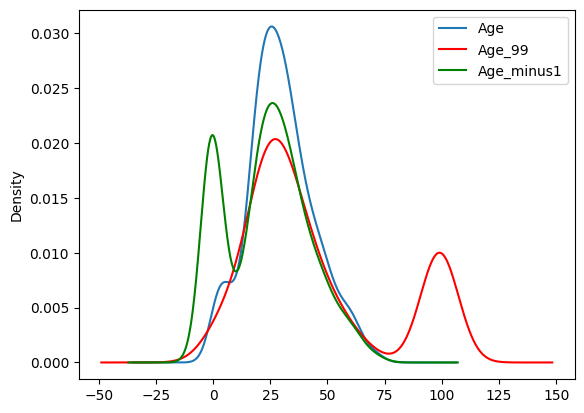

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Orginal variable distrubution
x_train['Age'].plot(kind = 'kde', ax=ax)

#Variable impute with 99:
x_train['Age_99'].plot(kind = 'kde', ax = ax, color = 'red')

#Variable impute with -1:
x_train['Age_minus1'].plot(kind = 'kde', ax = ax, color = 'green')

#add legends:
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

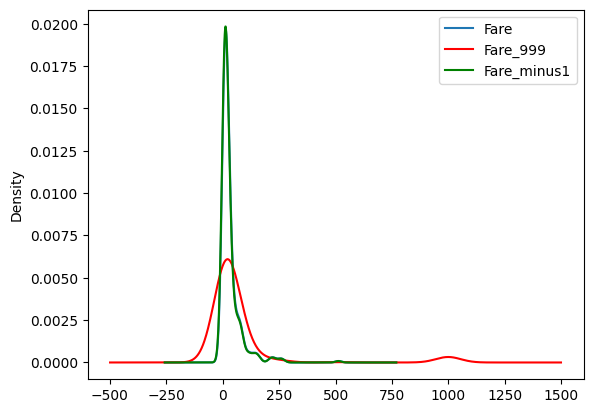

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Orginal variable distrubution
x_train['Fare'].plot(kind = 'kde', ax=ax)

#Variable impute with 99:
x_train['Fare_999'].plot(kind = 'kde', ax = ax, color = 'red')

#Variable impute with -1:
x_train['Fare_minus1'].plot(kind = 'kde', ax = ax, color = 'green')

#add legends:
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [ ]:
import seaborn as sns


<ipython-input-36-af59742b669d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'],label = 'Orginal',hist = False)
<ipython-input-36-af59742b669d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare_999'],label = 'Fare_999',hist = False)
<ipython-input-

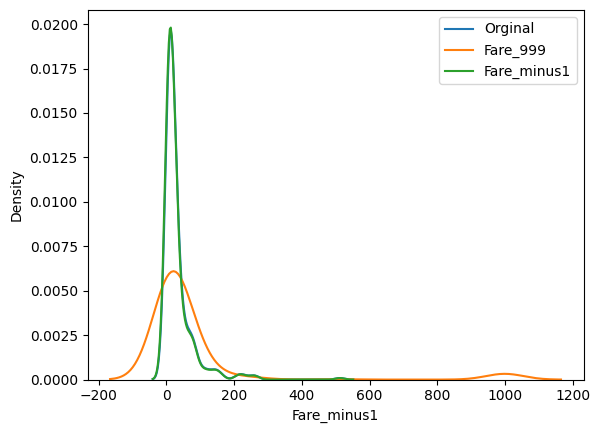

In [ ]:
sns.distplot(x_train['Fare'],label = 'Orginal',hist = False)
sns.distplot(x_train['Fare_999'],label = 'Fare_999',hist = False)
sns.distplot(x_train['Fare_minus1'],label = 'Fare_minus1',hist = False)

plt.legend()
plt.show()

In [ ]:
x_train.cov()

,Age,Parch,Fare,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,-2.333618,71.675938,204.349513,204.349513,-94.690989,74.437634
Parch,-2.333618,0.708695,8.638365,-4.990324,-0.450113,2.767563,8.440851
Fare,71.675938,8.638365,2450.422335,-103.851809,128.535222,2450.422335,2450.422335
Age_99,204.349513,-4.990324,-103.851809,951.727557,-189.535540,-383.952386,-89.241660
Age_minus1,204.349513,-0.450113,128.535222,-189.535540,318.089620,62.448070,124.854239
Fare_999,-94.690989,2.767563,2450.422335,-383.952386,62.448070,42474.837089,939.794108
Fare_minus1,74.437634,8.440851,2450.422335,-89.241660,124.854239,939.794108,2388.995505


In [ ]:
x_train.corr()

,Age,Parch,Fare,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,-0.182537,0.093527,1.000000,1.000000,-0.031202,0.099236
Parch,-0.182537,1.000000,0.205238,-0.192151,-0.029979,0.015952,0.205139
Fare,0.093527,0.205238,1.000000,-0.067830,0.144386,1.000000,1.000000
Age_99,1.000000,-0.192151,-0.067830,1.000000,-0.344476,-0.060389,-0.059184
Age_minus1,1.000000,-0.029979,0.144386,-0.344476,1.000000,0.016989,0.143226
Fare_999,-0.031202,0.015952,1.000000,-0.060389,0.016989,1.000000,0.093295
Fare_minus1,0.099236,0.205139,1.000000,-0.059184,0.143226,0.093295,1.000000


Using Sklearn:

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
imputer1 = SimpleImputer(strategy = 'constant', fill_value = 99)
imputer2 = SimpleImputer(strategy = 'constant',fill_value = 999)

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder = 'passthrough')

In [ ]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [ ]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [ ]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   1.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])